# Загрузка даних і первинний аналіз

Спершу імпортуємо необхідні бібліотеки, загружаємо дані і будуємо графіки часового ряду.

Проводимо первинну статистичну обробку часового ряду шляхом знаходження його основних характеристик: моди, медіани, максимума, мінімума, дисперсії, тощо.

В кінці було проведено перевірку на наявність порожніх значень у даних. Пропущених значень не було.

Після цього було здійснено побудову моделі лінійної регресії та нейронної мережі на основі попередніх значень ряду.

In [33]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy.stats as st
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import pacf
from statsmodels.regression.linear_model import yule_walker
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error

import tensorflow as tf

In [34]:
# Select data
data = pd.read_csv('data.txt', delimiter=',')
data = data['<CLOSE>']

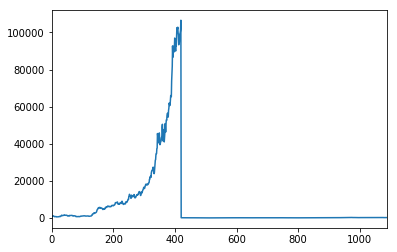

In [35]:
# Data plots
data.plot()

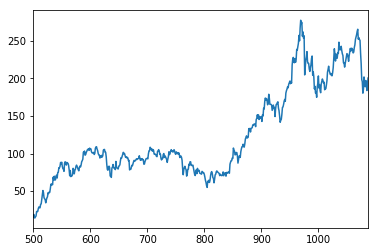

In [36]:
data[500:].plot()

In [37]:
data = data[500:]
data = data.to_numpy()
data = pd.DataFrame(data)

In [38]:
# Data statistics
data.describe()

,0
count,588.000000
mean,124.773997
std,61.690613
min,14.270000
25%,80.540000
50%,99.230000
75%,173.825000
max,277.490000


In [39]:
print("Skew: " + str(st.skew(data)))
print("Kurtosis: " + str(st.kurtosis(data)))

Skew: [0.72127047]
Kurtosis: [-0.65446226]


In [40]:
# There are no 'NA' value in the data
data.isna().any()

0    False
dtype: bool

# Формування та розділення даних

In [41]:
# Build regressions
# Split data into train and validation
from sklearn.model_selection import train_test_split
#c = (int)(len(df) * 0.1)
df = data
c = 10
lags = 5
for i in range(lags):
    df['t-' + str(i + 1)] = pd.Series(df[0].shift(i + 1))
df.head()

,0,t-1,t-2,t-3,t-4,t-5
0,15.58,NaN,NaN,NaN,NaN,NaN
1,18.99,15.58,NaN,NaN,NaN,NaN
2,14.40,18.99,15.58,NaN,NaN,NaN
3,14.27,14.40,18.99,15.58,NaN,NaN
4,15.81,14.27,14.40,18.99,15.58,NaN


In [42]:
df.fillna(0, inplace = True) 
df.head()

,0,t-1,t-2,t-3,t-4,t-5
0,15.58,0.00,0.00,0.00,0.00,0.0
1,18.99,15.58,0.00,0.00,0.00,0.0
2,14.40,18.99,15.58,0.00,0.00,0.0
3,14.27,14.40,18.99,15.58,0.00,0.0
4,15.81,14.27,14.40,18.99,15.58,0.0


In [43]:
X = df.loc[:, df.columns != 0]
y = df[0]
c = 10
y_train, y_test = y[:len(y)-c], y[len(y)-c:]
X_train, X_test = X[:len(y)-c], X[len(y)-c:]

# Допоміжні функції

In [44]:
import math
import numpy as np
# Функція для виведення точності моделі
def estimate(model, X_test, y_test):
    # make predictions
    predictions = model.predict(X_test)
    #for i in range(len(predictions)):
    #    print('predicted=%f, expected=%f' % (predictions[i], y_test[i]))
    rmse = math.sqrt(mean_squared_error(y_test, predictions))
    print('Test RMSE: %.3f' % rmse)
    # plot results
    plt.plot(y_test.to_numpy())
    plt.plot(predictions, color='red')
    plt.show()

# Побудова лінійної регресії

Test RMSE: 10.920


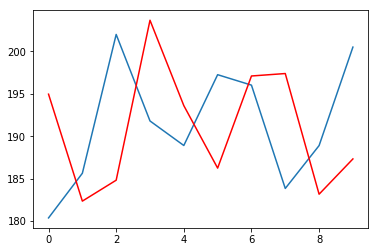

In [45]:
from sklearn import datasets, linear_model
# Create linear regression object
model = linear_model.LinearRegression()
# Train the model using the training sets
model.fit(X_train, y_train)
estimate(model, X_test, y_test)

# Побудова повнозв'язної нейронної мережі

In [46]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=6, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='relu'))
model.compile(optimizer = 'adam', loss = 'mae', metrics = ['accuracy'])
model.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

19/19 [==============================] - 0s 889us/step - loss: 119.7584 - accuracy: 0.0000e+00
Epoch 2/100
19/19 [==============================] - 0s 1ms/step - loss: 98.5504 - accuracy: 0.0000e+00
Epoch 3/100
19/19 [==============================] - 0s 2ms/step - loss: 73.0750 - accuracy: 0.0000e+00
Epoch 4/100
19/19 [==============================] - 0s 2ms/step - loss: 47.3148 - accuracy: 0.0000e+00
Epoch 5/100
19/19 [==============================] - 0s 1ms/step - loss: 21.4175 - accura

Epoch 73/100
19/19 [==============================] - 0s 1ms/step - loss: 5.4711 - accuracy: 0.0000e+00
Epoch 74/100
19/19 [==============================] - 0s 1ms/step - loss: 5.4071 - accuracy: 0.0000e+00
Epoch 75/100
19/19 [==============================] - 0s 1ms/step - loss: 5.3904 - accuracy: 0.0000e+00
Epoch 76/100
19/19 [==============================] - 0s 1ms/step - loss: 5.3588 - accuracy: 0.0000e+00
Epoch 77/100
19/19 [==============================] - 0s 1ms/step - loss: 5.3843 - accuracy: 0.0000e+00
Epoch 78/100
19/19 [==============================] - 0s 1ms/step - loss: 5.3603 - accuracy: 0.0000e+00
Epoch 79/100
19/19 [==============================] - 0s 1ms/step - loss: 5.2938 - accuracy: 0.0000e+00
Epoch 80/100
19/19 [==============================] - 0s 1ms/step - loss: 5.3639 - accuracy: 0.0000e+00
Epoch 81/100
19/19 [==============================] - 0s 1ms/step - loss: 5.2488 - accuracy: 0.0000e+00
Epoch 82/100
19/19 [==============================] - 0s 1ms/ste

Test RMSE: 10.272


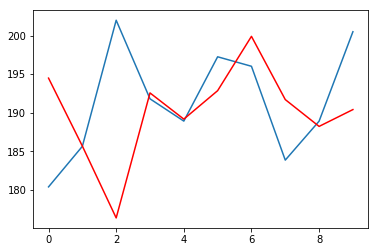

In [18]:
estimate(model, X_test, y_test)

# Побудова авторегресійних моделей із аналізом автокореляцій

По графіку ряду бачимо, що перед нами ряд, який експоненційно зростає до  y(400), після чого різко падає і знову починає зростати. Хоча вже наступні значення не настільки великі, тому щоб побачити зростання було побудовано частину графіка починаючи з 500-того значення.

Візуально можемо помітити наявність тренду, щоб отримати додаткову впевненість скористаємось методом, який візуально виділяє тренд, сезонність та залишок.

Тому ми ліквідовуємо його шляхом першої різниці між значеннями вектора.

Шляхом перевірки статистичних показників ADF(достатньо велике від'ємне число) та p-value(менше 0.05) ми можемо сказати, що новий отриманий ряд є стаціонарним і ми можемо застосувати до нього моделі авторегресії

In [47]:
df = df[0]
df.head()

0    15.58
1    18.99
2    14.40
3    14.27
4    15.81
Name: 0, dtype: float64

/home/username/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: the 'freq' keyword is deprecated, use 'period' instead
  


<Figure size 800x1600 with 0 Axes>

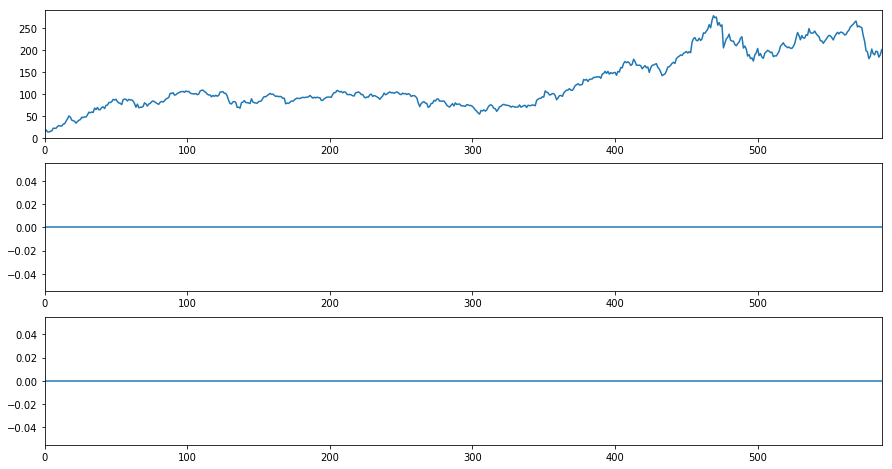

In [48]:
# Trends and seasonality
import statsmodels as sm
import statsmodels.api as sm
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 20), dpi=80, facecolor='w', edgecolor='k')
res = sm.tsa.seasonal_decompose(df, model = 'additive', freq=1)
#fig = res.plot()
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,8))
res.trend.plot(ax=ax1)
res.seasonal.plot(ax=ax2)
res.resid.plot(ax=ax3)

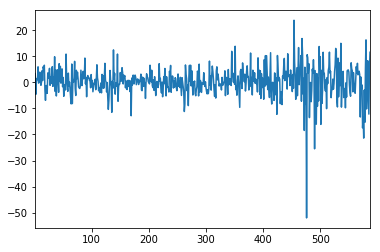

In [49]:
#df = np.log(df)
df = df.diff()
df = df.drop(df.index[0])
df.plot()

In [50]:
ad_fuller_result = adfuller(df)
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -15.760799213277764
p-value: 1.1923751274039564e-28


# Автокореляція

Проведено первинний аналіз для визначення доцільності побудови авторегресійної моделі шляхом обчислення автокореляцій між вектором даних та зміщеним вектором.

За графіком АКФ бачимо несуттєву кореляцію між першими елементами стаціонарного ряду. Тому порядок авторегресії беремо невеликі значення

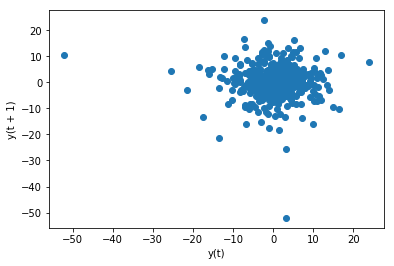

In [51]:
# Quick check to find out whether there is any correlation between y(t) and y(t-1)
from pandas.plotting import lag_plot
lag_plot(df) # Correlation between y(t) and y(t+1)

In [52]:
lags = 5
dataframe = pd.DataFrame(df.values)
dataframe.columns = ['t']
for i in range(lags):
    dataframe['t-' + str(i + 1)] = df.shift(i + 1)
result = dataframe.corr()
print(result)

            t       t-1       t-2       t-3       t-4       t-5
t    1.000000  0.085307 -0.060422 -0.010281 -0.008487 -0.021830
t-1  0.085307  1.000000 -0.023484  0.093988 -0.061897 -0.014420
t-2 -0.060422 -0.023484  1.000000 -0.024621  0.099975 -0.064330
t-3 -0.010281  0.093988 -0.024621  1.000000 -0.023998  0.099742
t-4 -0.008487 -0.061897  0.099975 -0.023998  1.000000 -0.022656
t-5 -0.021830 -0.014420 -0.064330  0.099742 -0.022656  1.000000


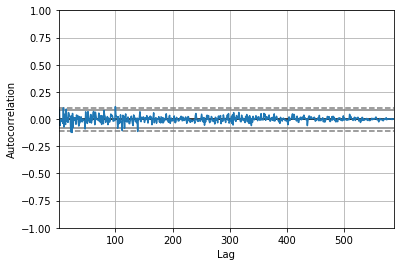

In [53]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df) 
# Autocorrelation between y(t) and y(t-lag), 
# there is quite strong correlation between y(t) and y(t-lag) when lag < 100

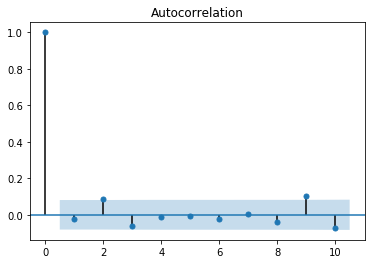

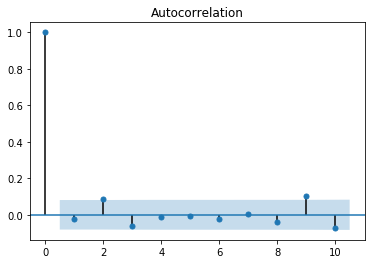

In [54]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df, lags=10) # ACF function between y(t) and y(t-lag) where lag is [1; 10]

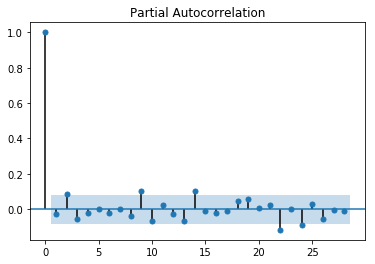

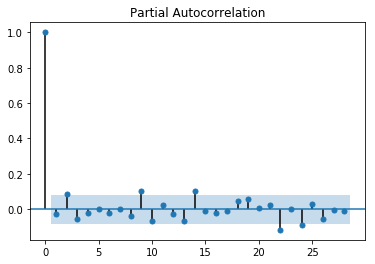

In [55]:
plot_pacf(df)

# Побудова моделей авторегресії

In [58]:
# create and evaluate a static autoregressive model
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt
# train autoregression
model = AutoReg(y_train, lags=20)
model = model.fit()
print('Coefficients: %s' % model.params)

Coefficients: intercept    0.934648
y.L1         0.998520
y.L2         0.119278
y.L3        -0.210046
y.L4         0.053622
y.L5         0.058482
y.L6        -0.020256
y.L7        -0.051093
y.L8         0.010170
y.L9         0.148879
y.L10       -0.172408
y.L11        0.087558
y.L12       -0.045413
y.L13       -0.014729
y.L14        0.146103
y.L15       -0.122430
y.L16       -0.005338
y.L17        0.014135
y.L18        0.062895
y.L19        0.000482
y.L20       -0.064230
dtype: float64


/home/username/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,


Test RMSE: 8.388


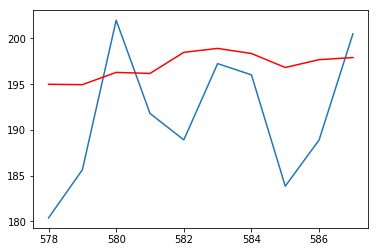

In [59]:
# make predictions
predictions = model.predict(start=len(y_train), end=len(y_train)+len(y_test)-1, dynamic=False)
#for i in range(len(predictions)):
#    print('predicted=%f, expected=%f' % (predictions[i], y_test[i]))
rmse = sqrt(mean_squared_error(y_test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot results
plt.plot(y_test)
plt.plot(predictions, color='red')
plt.show()

Висновки по роботі:

В роботі було побудовано моделі лінійної регресії, нейронної мережі та авторегресії (із використанням вбудованої функції). Для побудованих моделей обчислено показник RMSE, який найнижчим виявився для авторегресії побудованої після видалення тренду.